In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [2]:
# Drop columns with more than 50% missing values
df = df.dropna(axis=1, thresh=0.5)

# Fill missing values with the mean of each column
df = df.fillna(df.mean())

In [3]:
# Identify columns with mixed data types
mixed_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).applymap(lambda x: x.isdigit()).any()]

# Convert mixed columns to numeric
for col in mixed_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Check data types after conversion
df.dtypes

C:\Users\sowmy\AppData\Local\Temp\ipykernel_24136\1071996636.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mixed_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).applymap(lambda x: x.isdigit()).any()]


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [4]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define outlier replacement strategy
def replace_outliers(df, col):
  # Calculate IQR
  IQR = np.percentile(df[col], 75) - np.percentile(df[col], 25)
  # Calculate lower and upper bounds
  lower_bound = np.percentile(df[col], 25) - 1.5 * IQR
  upper_bound = np.percentile(df[col], 75) + 1.5 * IQR
  # Replace outliers with bounds
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier replacement to numeric columns
for col in numeric_cols:
  replace_outliers(df, col)

In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


In [6]:
# Identify columns with high standard deviation
high_std_cols = df.loc[:, df.std() > 10].columns

# Print interesting findings
print("Columns with high standard deviation:", high_std_cols)

# Identify columns with low variance
low_var_cols = df.loc[:, df.var() < 0.5].columns

# Print interesting findings
print("Columns with low variance:", low_var_cols)

# Identify columns with outliers
outlier_cols = [col for col in numeric_cols if df[col].skew() > 1 or df[col].skew() < -1]

# Print interesting findings
print("Columns with outliers:", outlier_cols)

Columns with high standard deviation: Index(['ASTV', 'ALTV', 'Width'], dtype='object')
Columns with low variance: Index(['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'Tendency', 'NSP'], dtype='object')
Columns with outliers: ['AC', 'FM', 'DL', 'ALTV']


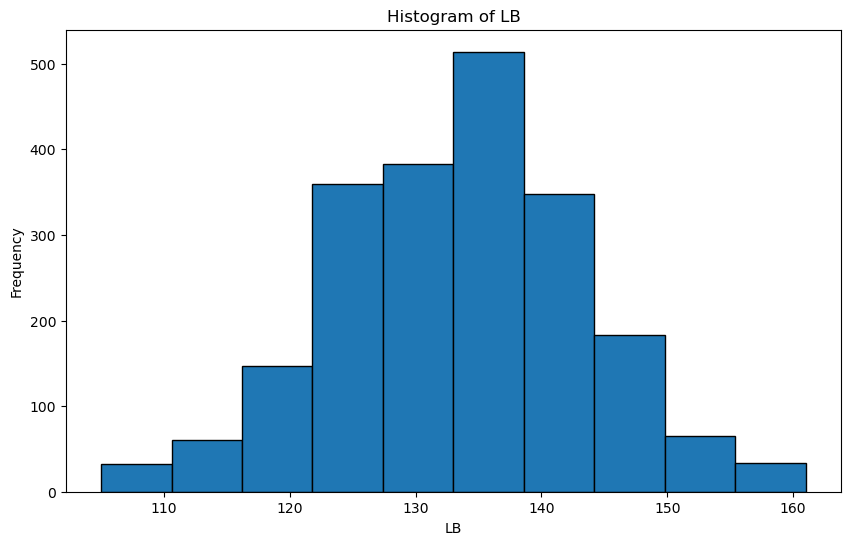

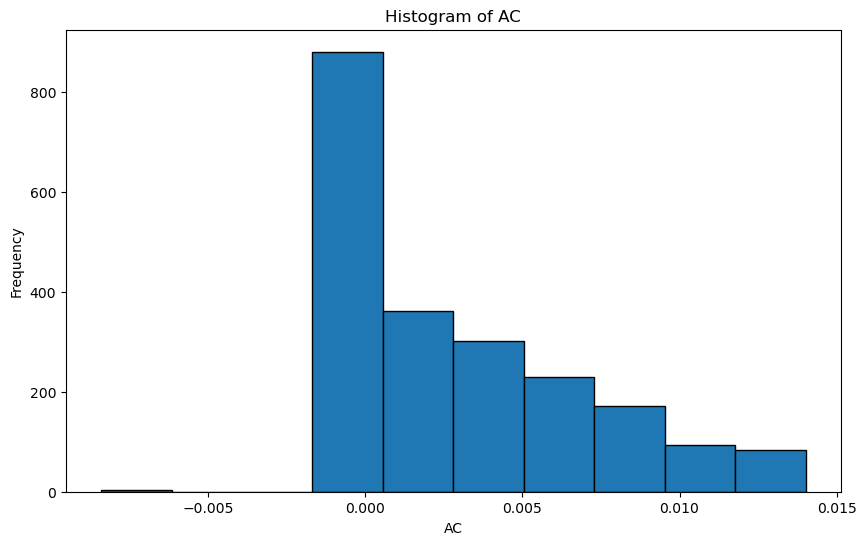

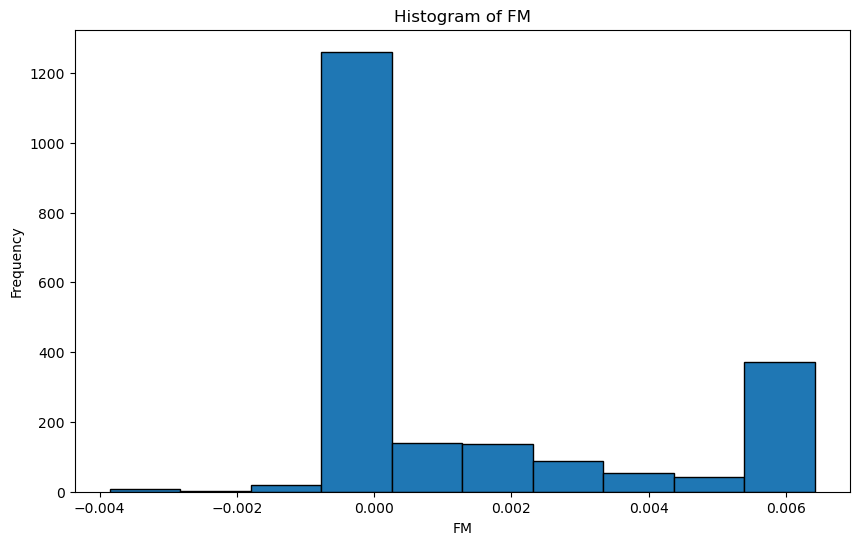

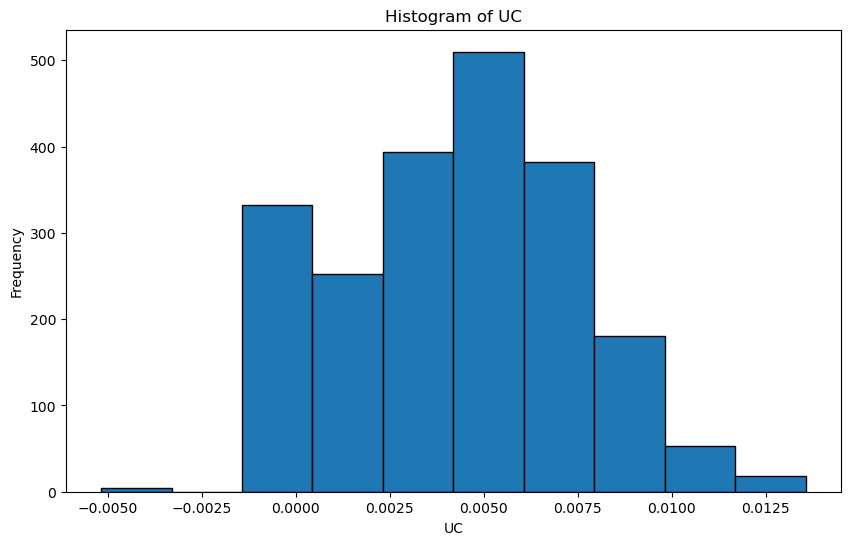

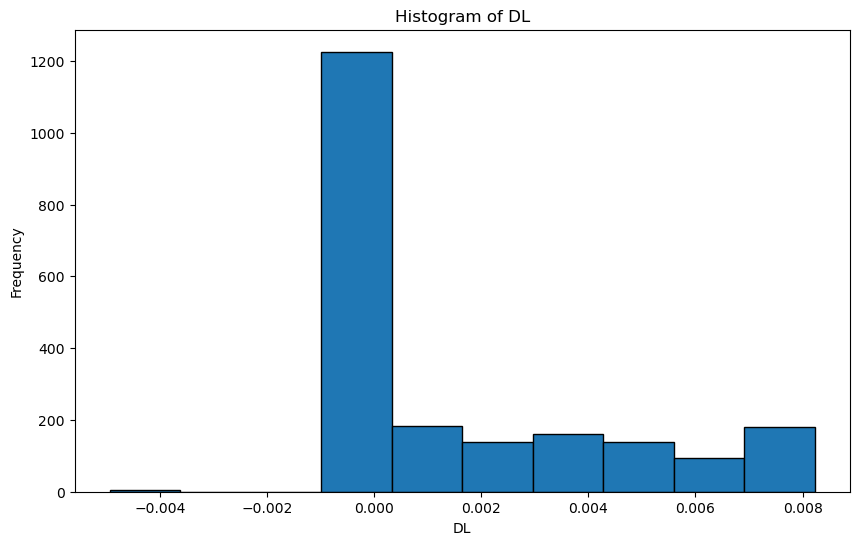

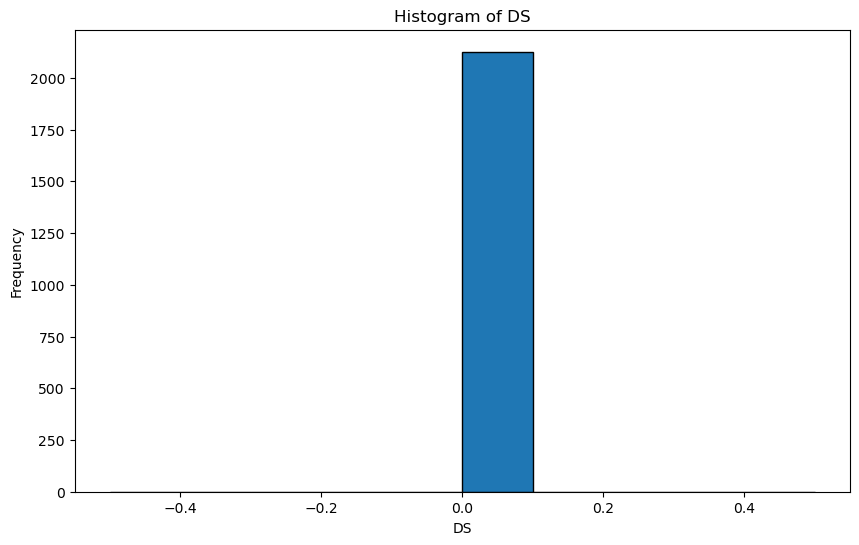

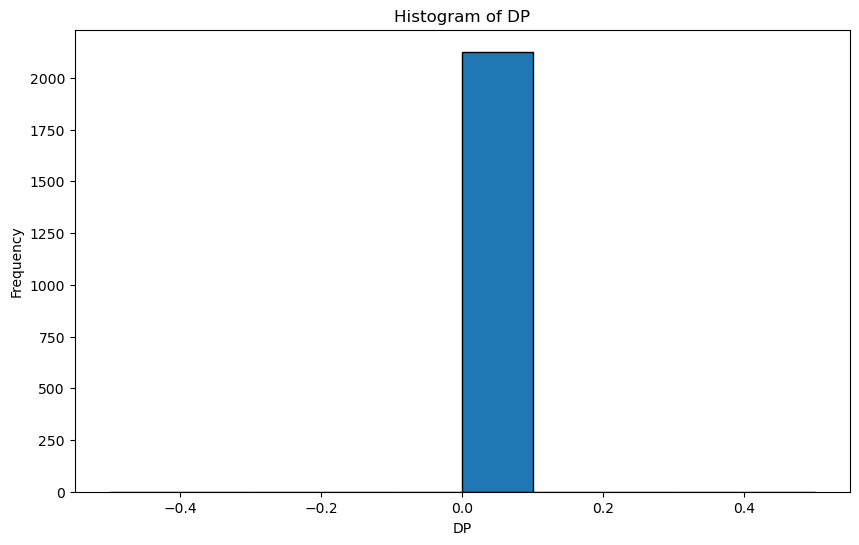

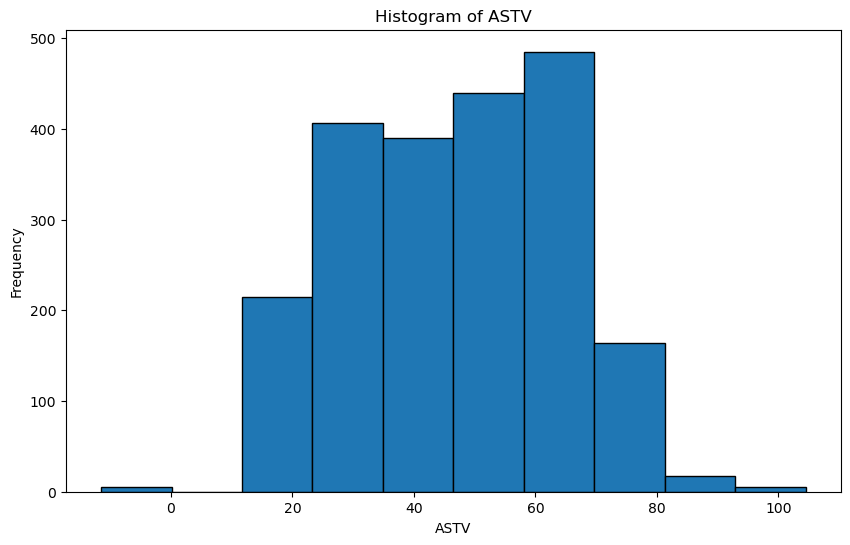

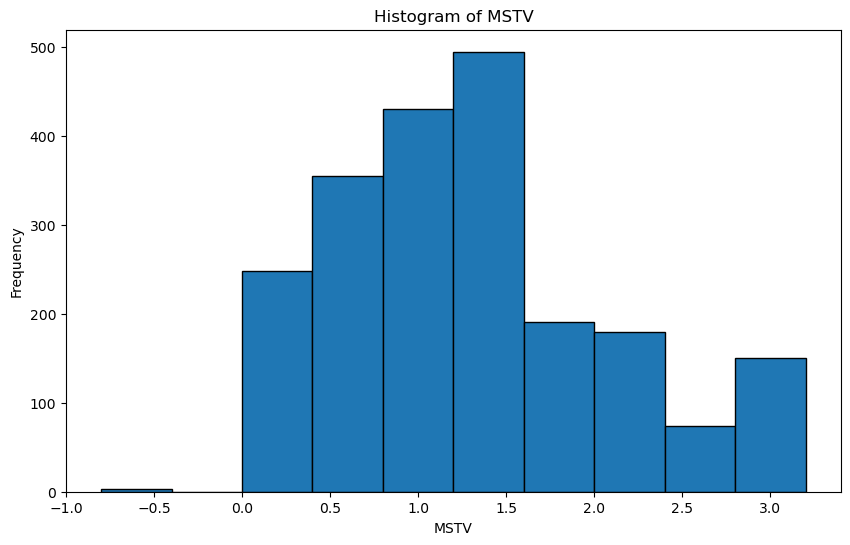

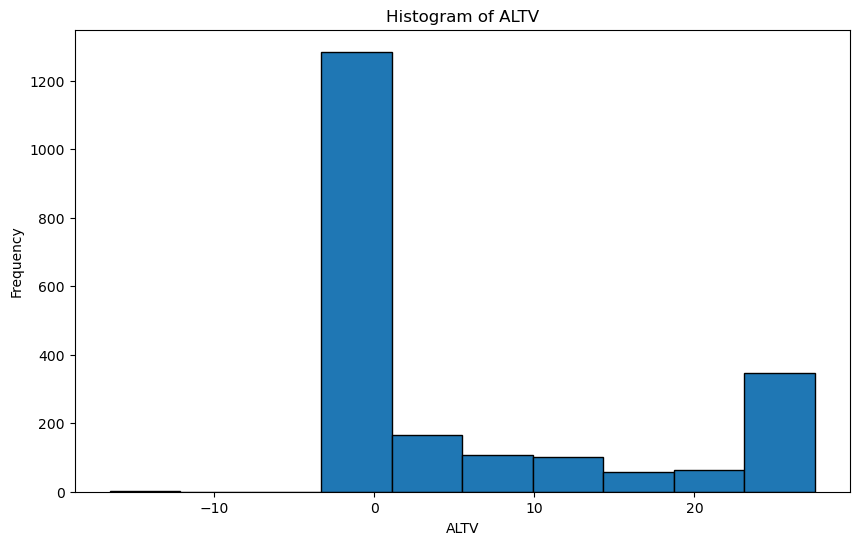

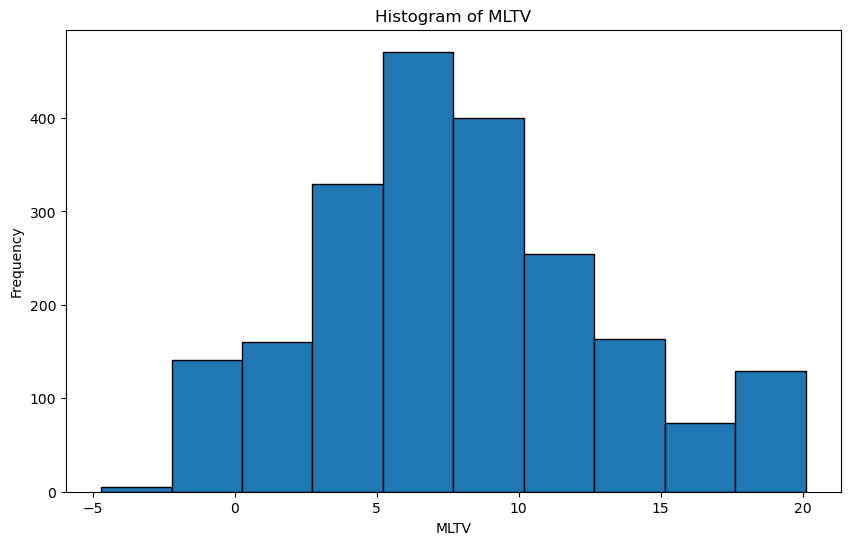

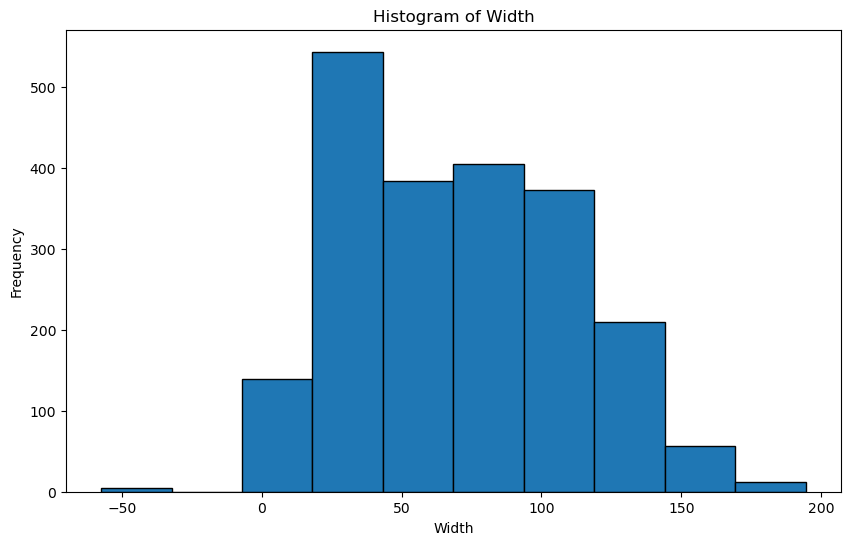

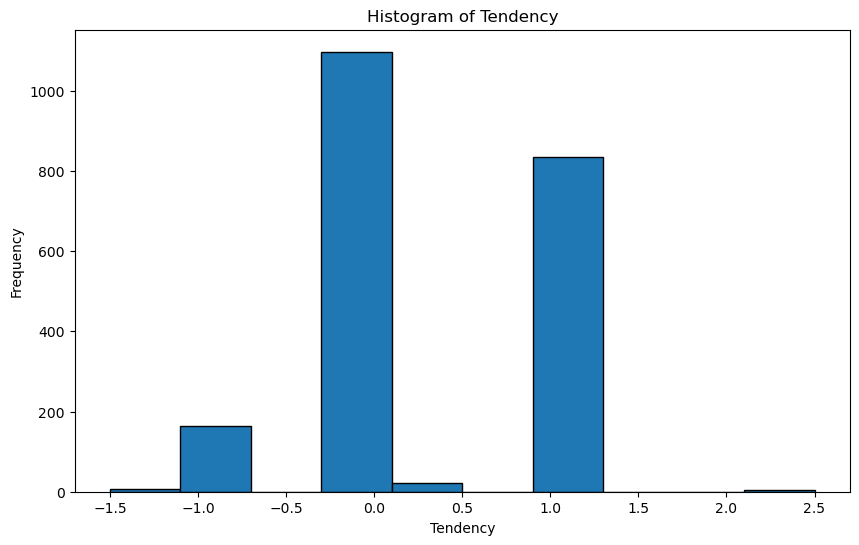

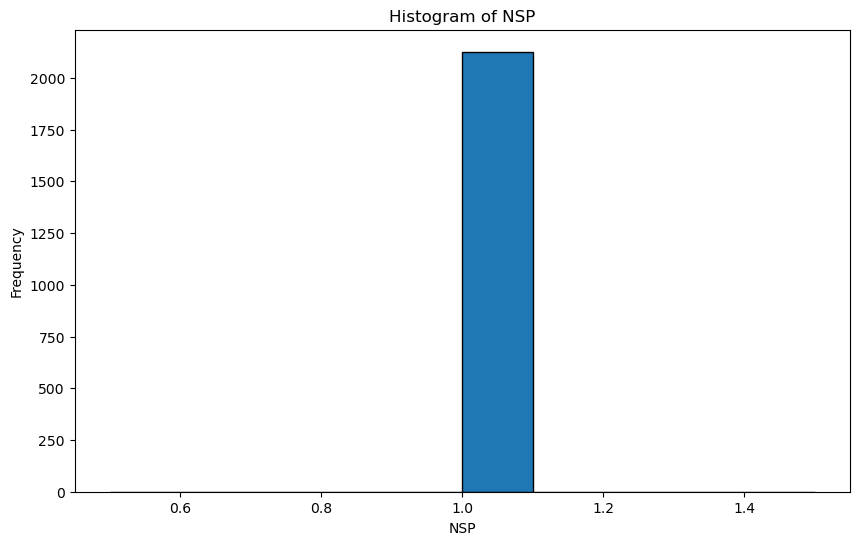

In [7]:
import matplotlib.pyplot as plt

for col in numeric_cols:
  plt.figure(figsize=(10, 6))
  plt.hist(df[col], bins=10, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

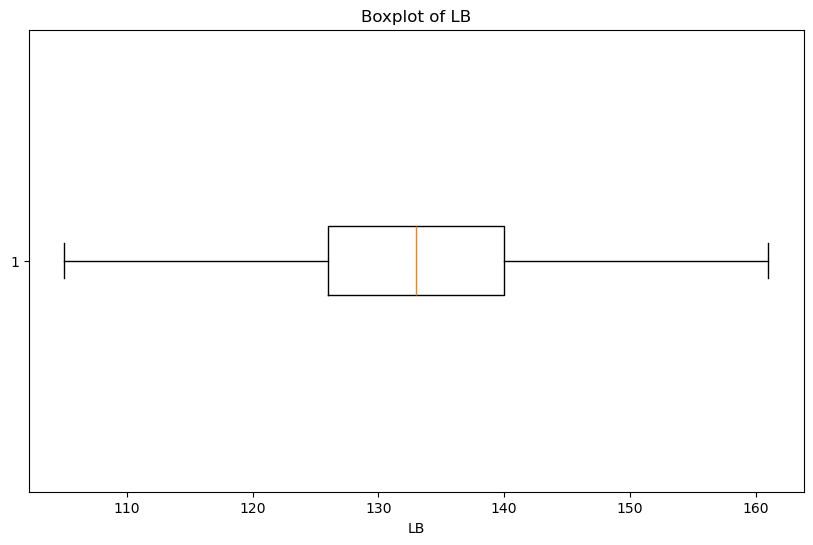

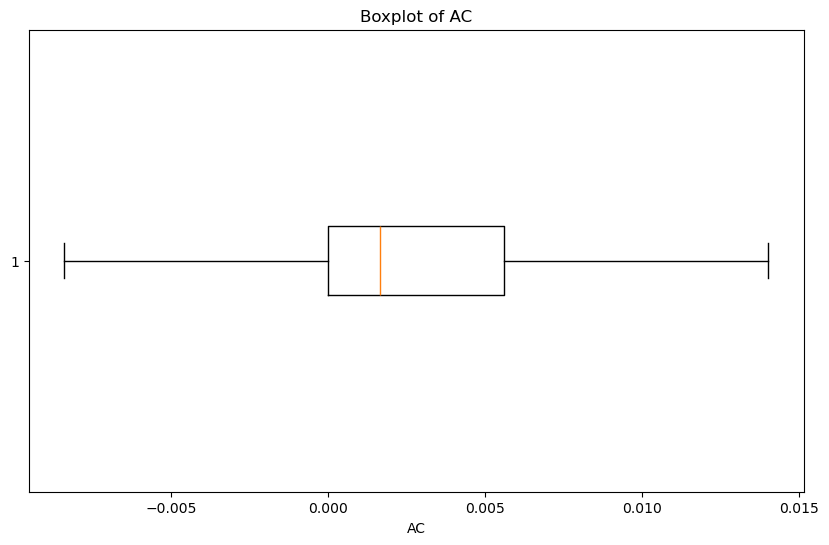

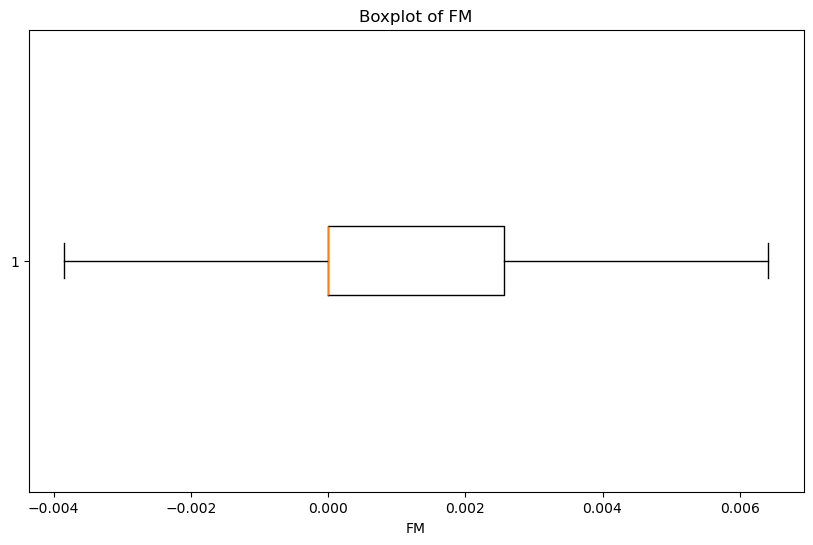

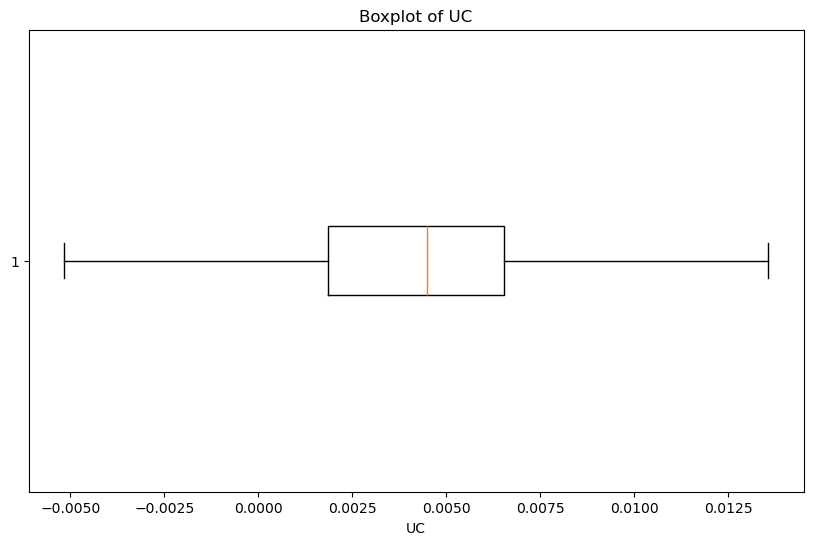

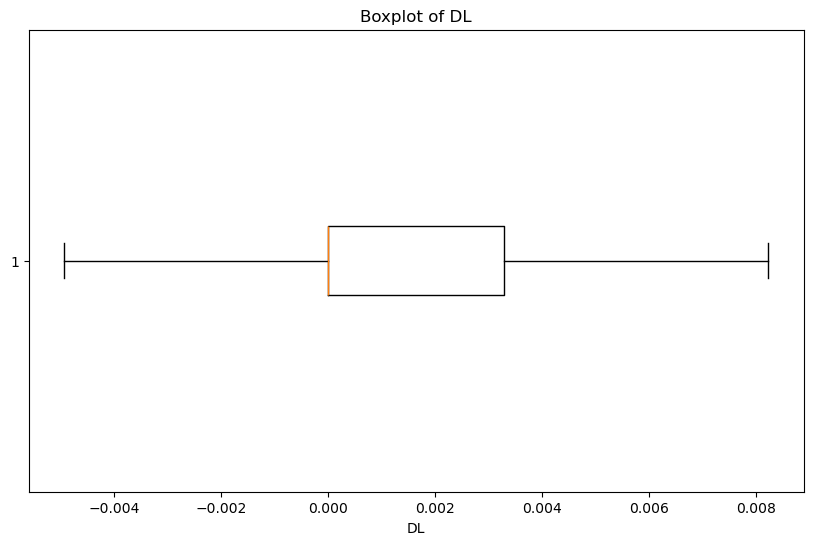

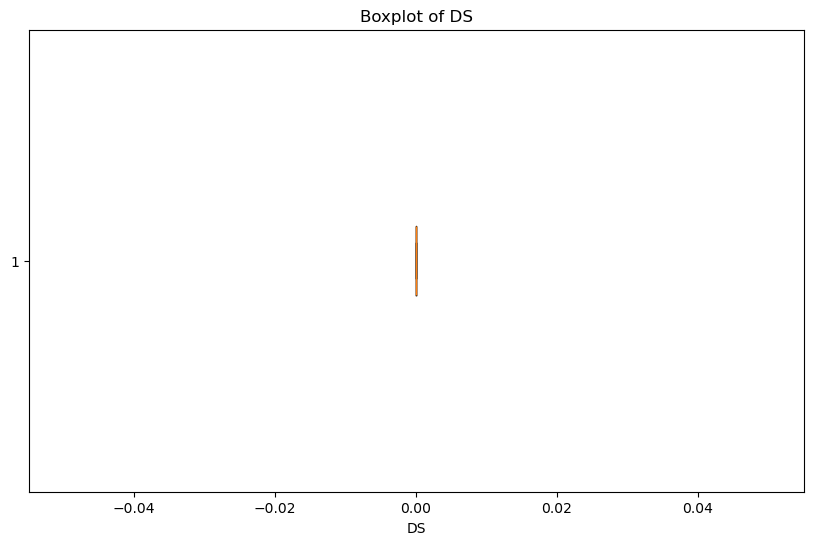

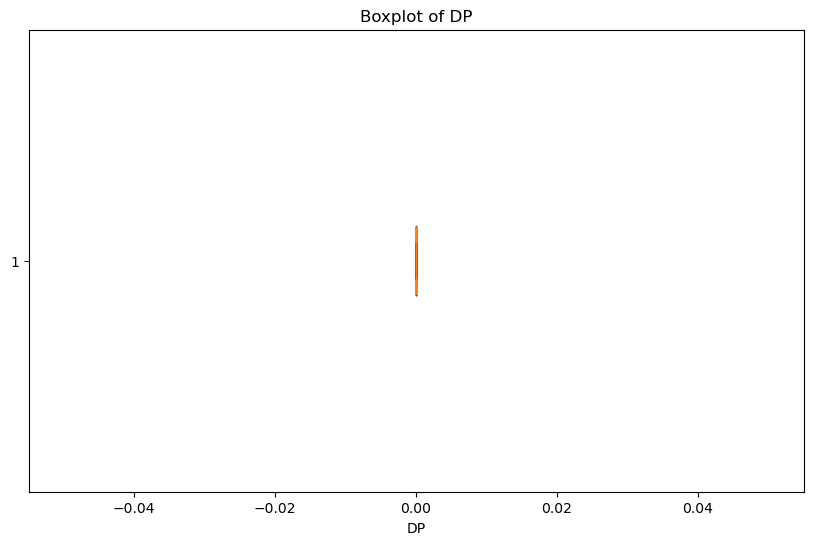

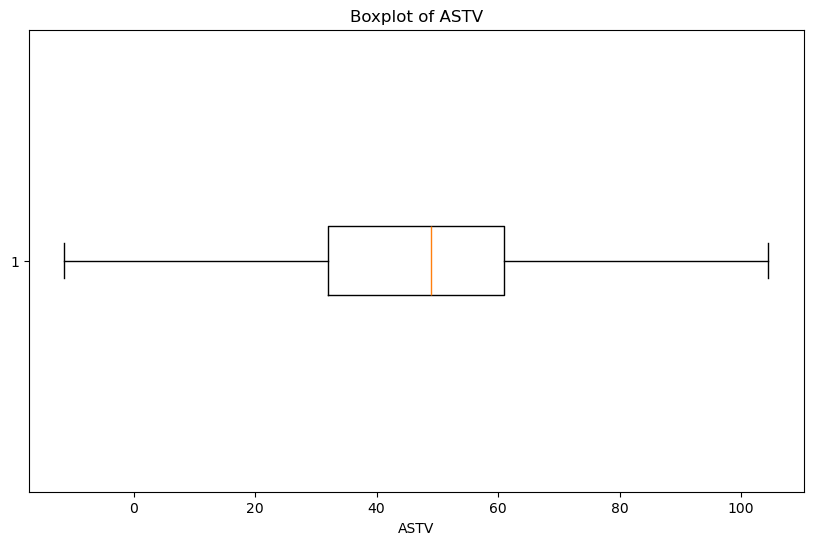

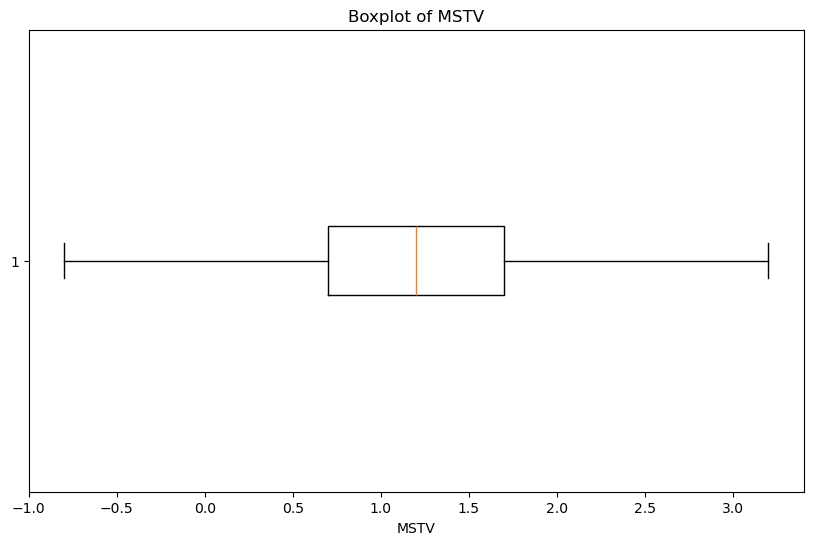

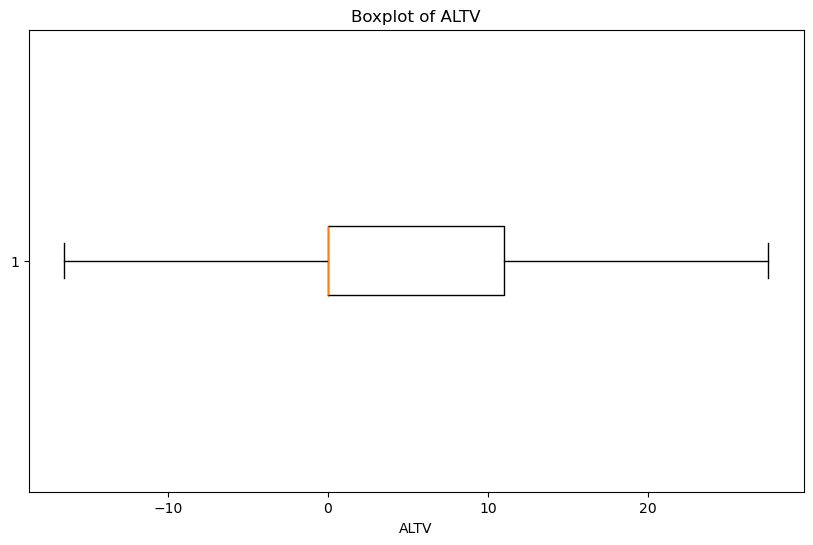

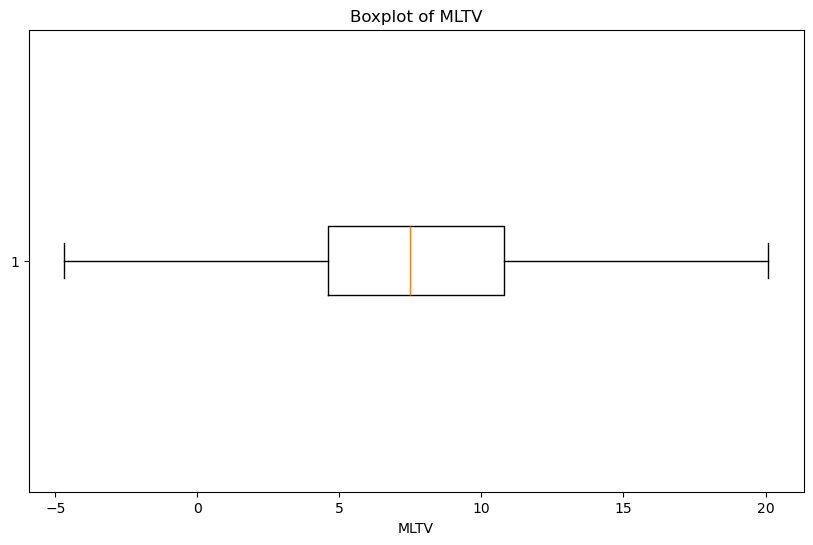

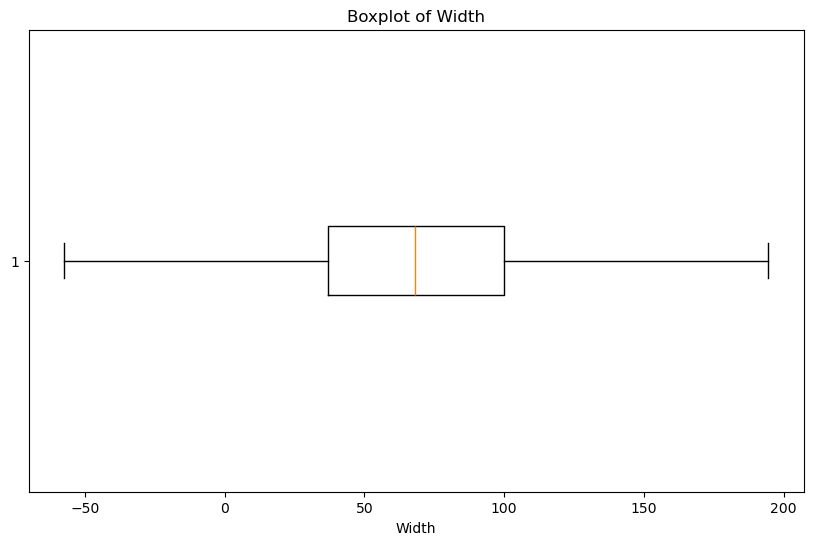

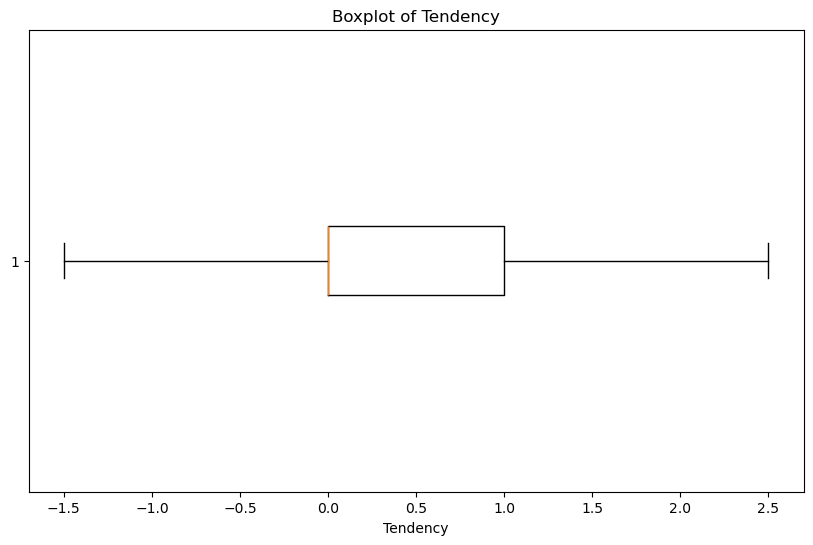

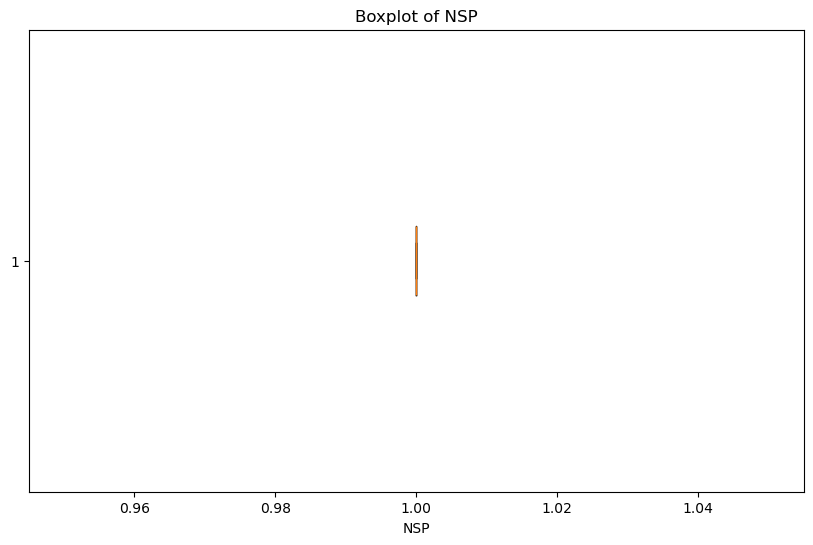

In [8]:
import matplotlib.pyplot as plt

for col in numeric_cols:
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[col], vert=False)
  plt.title('Boxplot of ' + col)
  plt.xlabel(col)
  plt.show()

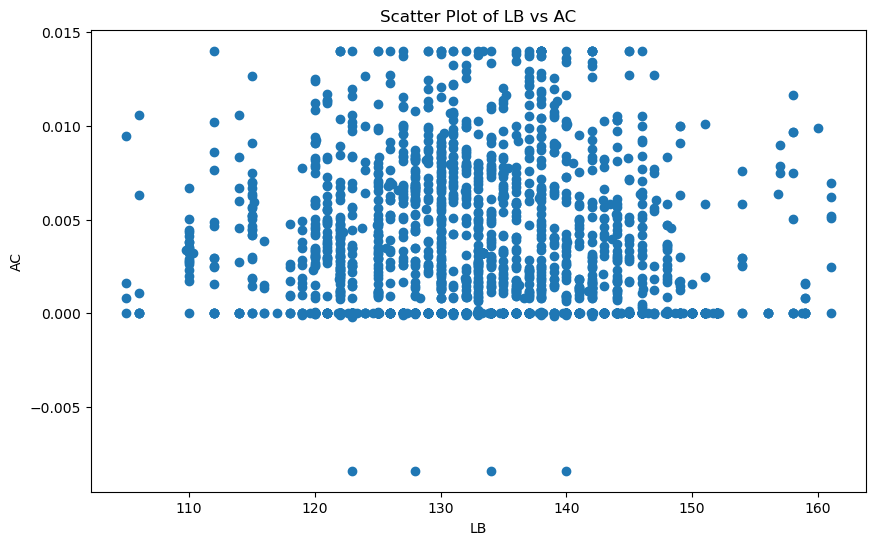

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
# Generate a scatter plot for two numerical columns
plt.figure(figsize=(10, 6))
plt.scatter(df['LB'], df['AC'])
plt.xlabel('LB')
plt.ylabel('AC')
plt.title('Scatter Plot of LB vs AC')
plt.show()

# Generate a correlation heatmap for all numerical columns
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()